# Projeto #3 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

#### Estrutura educacional X Desempenho ENEM: [Kaggle](https://www.kaggle.com/andraguiar/estrutura-educacional-x-desempenho-enem)

A base escolhida é a de Censo demográfico e sinópses do ENEM, diponibilizadas nos sites dos órgãos competentes ([IBGE](http://www.dados.gov.br/dataset/cd-censo-demografico) e [INEP](http://portal.inep.gov.br/sinopses-estatisticas-da-educacao-basica)) para conulta pública. Os dados utilizados foram coletados entre 2014 e 2019 contendo a região geográfica, UF e os dados estatísticos do Brasil e do exame nacional do ensino fundamental. Serão consideradas somente as informações estruturais educacionais e desempenho no ENEM para identificar possíveis correlações entre quantidade de escolas, tipo de ensino, docentes e matrículas, e desempenho no exame(ENEM). Tendo em vista que ainda não foram disponibilizados os dados de 2019, serão feitas algumas predições e definições de idicadores considerando as medianas, utilizando regressores e classificadores supervisionados, juntamente com técnicas de mineração e pré-processamento de dados.

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

#### O estudo tem como objetivo principal verificar a correlação entre a estrutura educacional do ensino fundamental dos estados e DF e o desempenho(Mediana) no exame nacional do ensino médio(ENEM).

A base de dados contém as medianas de cada matéria de cada unidade federativa e seus municípios de 2014 a 2018, o desempenho será comparado pela média simples das medianas de cada matéria de cada estado e DF em cada ano. Também serão utilizados os dados do censo demográfico de 2019 para predição e classificação.

<ol>
    <li>A Extenção territorial influencia no desempenho?</li>
    <li>A densidade populacional(hab/km²) influencia no desempenho?</li>
    <li>A proporção de habitantes/Escola influencia no desempenho?</li>
    <li>A proporção de matrículas/Escola influencia no desempenho?</li>
    <li>A proporção de docentes/Escola influencia no desempenho?</li>
    <li>A proporção de docentes/matrícula influencia no desempenho?</li>
</ol>

Obs.: Não serão consideradas as características individuais dos estudantes.  

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

#### Para este estudo, a preparação dos dados consite em estimar a quantidade de inscritos no ENEM de 2019 Municípios/UF e calcular as proporções das variáveis que serão utilizadas mesclando as tabelas específicas para cada caso.

A estrutura do projeto está na arquitetura MVC, então as classes view, control e model estão disponíveis na estrutura de pastas do projeto e os datasets na pasta CSVs.

Nessa 1ª parte do estudo, será necessário modelar regressores para estimar a quantidade de inscritos no ano de 2019 dos municípios e Unidades Federativas. Serão comparados 4 algorítmos regressores que submetidos a testes matemáticos para seleção do que obtiver o melhor resultados.

Os dados faltantes foram considerados como 0. Ex.: Se não havia quantidade de escolas especiais registradas é porque não foram  informadas ou não existiam de fato.

In [34]:
"""
Importa as classes Municipio e Analise"""
from model.municipio import Municipio
from model.analise import Analise
"""
Instancia a classe com as funções inerentes"""
municipio = Municipio()
analise = Analise()

In [35]:
df = municipio.gerar_dados()                   # Carrega os dados selecionados das tabelas
df.info()                                      # Imprime as informações das features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27448 entries, 0 to 27447
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          27448 non-null  float64
 1   NM_UF_SIGLA                  27448 non-null  object 
 2   COD. MUNIC                   27448 non-null  int64  
 3   NOME_MUNICÍPIO               27448 non-null  object 
 4   AREA_km²                     27448 non-null  float64
 5   POPULAÇÃO ESTIMADA           27448 non-null  object 
 6   MAT_Edu_ Infantil            27448 non-null  object 
 7   MAT_Ens_Fundamental          27448 non-null  object 
 8   MAT_Ens_ Médio               27448 non-null  object 
 9   MAT_Educ_Prof_Técnica_Médio  27448 non-null  object 
 10  MAT_Educ_Profissional(FIC)   27448 non-null  object 
 11  MAT_EJA                      27448 non-null  object 
 12  MAT_Educ_ Especial           27448 non-null  object 
 13  QTD_Edu_ Infanti

In [3]:
df.head(5)

ano NM_UF_SIGLA  COD. MUNIC         NOME_MUNICÍPIO  AREA_km²  \
0  2014.0          RO     1100015  ALTA FLORESTA D'OESTE  7067.025   
1  2014.0          RO     1100023              ARIQUEMES  4426.571   
2  2014.0          RO     1100031                 CABIXI  1314.352   
3  2014.0          RO     1100049                 CACOAL  3792.998   
4  2014.0          RO     1100056             CEREJEIRAS  2783.300   

  POPULAÇÃO ESTIMADA MAT_Edu_ Infantil MAT_Ens_Fundamental MAT_Ens_ Médio  \
0              25652               490               4.145          1.046   
1             102860             3.044              16.758          4.258   
2               6424               230                 950            246   
3              86556             2.593              12.683          4.312   
4              18013               540               2.538            585   

  MAT_Educ_Prof_Técnica_Médio  ... NU_NOTA_CN NU_NOTA_CH NU_NOTA_LC  \
0                        -     ...     498.55     555.70     494.80   
1                       1.169  ...     470.30     545.75     502.45   
2                        -     ...     523.70     567.20     568.20   
3                       1.795  ...     478.55     561.20     510.30   
4                        -     ...     485.00     551.90     504.25   

  NU_NOTA_MT NU_NOTA_REDACAO CAND_ESC_PUB CAND_ESC_PRI ENS_REGULAR ENS_EJA  \
0     463.20           410.0         44.0          0.0        37.0     7.0   
1     448.75           360.0        206.0          5.0       165.0    45.0   
2     475.60           440.0          1.0          0.0         1.0     0.0   
3     453.00           400.0        285.0         22.0       252.0    53.0   
4     467.05           510.0         21.0          3.0        20.0     4.0   

  ENS_ESPECIAL  
0          0.0  
1          1.0  
2          0.0  
3          2.0  
4          0.0  

[5 rows x 59 columns]

In [36]:
"""
Os valores NaN foram substituidos por 0 considerando que existem.
De acordo com o dicioário do dataset, as quantidades não informadas ou que de fato não existem
foram registradas como hífen(NaN) """
df = municipio.tratar_dados(list(df.columns[5:-10]))    # Trata os valores faltantes e seus tipos
df = municipio.calcular_totais()                        # Calcula os totais de Escolas, Docentes e Matrículas
df = municipio.calcular_densidade()                     # Calcula as densidades de Habitantes, Escolas, Docentes e Matrículas
df = municipio.classificar()                            # Classifica os resultados satisfatórios como 2
                                                        # Classifica os resultados regulares como 1
                                                        # Classifica os resultados insatisfatórios como 0
df.shape                                                # Imprime o formato final do DataFrame

(27448, 76)

In [5]:
df.describe()

ano    COD. MUNIC       AREA_km²  POPULAÇÃO ESTIMADA  \
count  27448.000000  2.744800e+04   27448.000000        2.744800e+04   
mean    2016.005064  3.250414e+06    1532.838606        3.745319e+04   
std        1.413676  9.834311e+05    5627.852302        2.185651e+05   
min     2014.000000  1.100015e+06       3.565000        7.860000e+02   
25%     2015.000000  2.512200e+06     205.539250        5.605000e+03   
50%     2016.000000  3.145364e+06     420.357000        1.173950e+04   
75%     2017.000000  4.117827e+06    1029.624000        2.535925e+04   
max     2018.000000  5.300108e+06  159533.328000        1.217687e+07   

       MAT_Edu_ Infantil  MAT_Ens_Fundamental  MAT_Ens_ Médio  \
count       27448.000000         2.744800e+04    27448.000000   
mean         1505.243005         5.045909e+03     1460.825634   
std          9899.104338         2.563982e+04     8652.076292   
min            12.000000         7.400000e+01        0.000000   
25%           216.000000         7.700000e+02      206.000000   
50%           468.000000         1.685000e+03      425.000000   
75%          1081.000000         3.773250e+03      970.000000   
max        661442.000000         1.447216e+06   522226.000000   

       MAT_Educ_Prof_Técnica_Médio  MAT_Educ_Profissional(FIC)        MAT_EJA  \
count                 27448.000000                27448.000000   27448.000000   
mean                    333.194404                   11.219360     646.702128   
std                    2675.370587                   79.655166    2970.141184   
min                       0.000000                    0.000000       0.000000   
25%                       0.000000                    0.000000      45.000000   
50%                       0.000000                    0.000000     175.000000   
75%                      90.000000                    0.000000     504.000000   
max                  161968.000000                 3026.000000  134550.000000   

       ...  TOTAL_DOCENTE_PRI  TOTAL_ESCOLA_PUB  TOTAL_ESCOLA_PRI  \
count  ...       27448.000000      27448.000000      27448.000000   
mean   ...          89.892014         20.743879          6.591919   
std    ...         963.955779         42.199953         50.112370   
min    ...           0.000000          1.000000          0.000000   
25%    ...           0.000000          5.000000          0.000000   
50%    ...           5.000000         11.000000          1.000000   
75%    ...          38.000000         23.000000          4.000000   
max    ...      111812.000000       1873.000000       2344.000000   

            HAB/km²    ESCOLA/km²     HAB/ESCOLA  MATRIC/ESCOLA  \
count  27448.000000  27448.000000   27448.000000   27448.000000   
mean     118.451851      0.225418     546.435600     130.597691   
std      616.635832      0.867820    2791.487242     652.586199   
min        0.058484      0.000446       1.225702       0.246862   
25%       12.036568      0.034198     242.718842      61.000000   
50%       25.531349      0.076330     351.936492      85.088008   
75%       56.321676      0.173389     504.784862     117.190625   
max    14006.768687     55.965038  226464.454545   52368.909091   

       DOCENTE/ESCOLA  MATRICULA/DOCENTE        CLASSE  
count    27448.000000       27448.000000  27448.000000  
mean         8.797775          14.983403      0.933001  
std          3.353518          73.134609      0.288709  
min          1.640000           0.020214      0.000000  
25%          6.214286           8.708342      1.000000  
50%          8.554701          10.719134      1.000000  
75%         11.000000          12.942721      1.000000  
max         29.000000        6063.008850      2.000000  

[8 rows x 74 columns]

### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

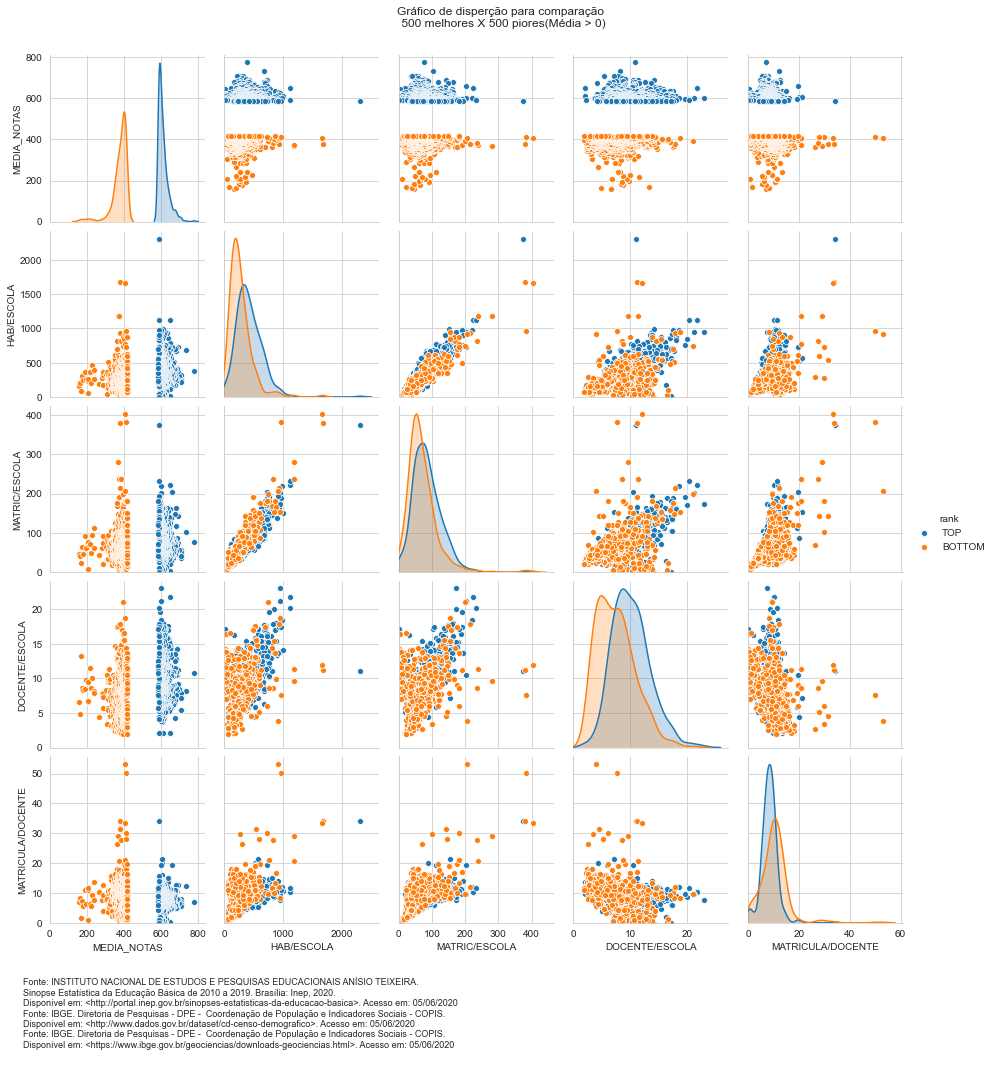

In [6]:
analise.compara_dispersao(df)

O gráfico acima compara as 500 melhores médias com as 500 piores médias. E não há linearidade aparente entre as médias e as outras variáveis, mas dá para notar que a maioria dos municípios que obtiveram as melhores notas têm a densidade de Docentes / Escolas maior e de Matrículas / Docentes menor que os municípios com os piores resultados. Mas não se pode dizer que há correlação relevante entre os resultados e essas variáveis.

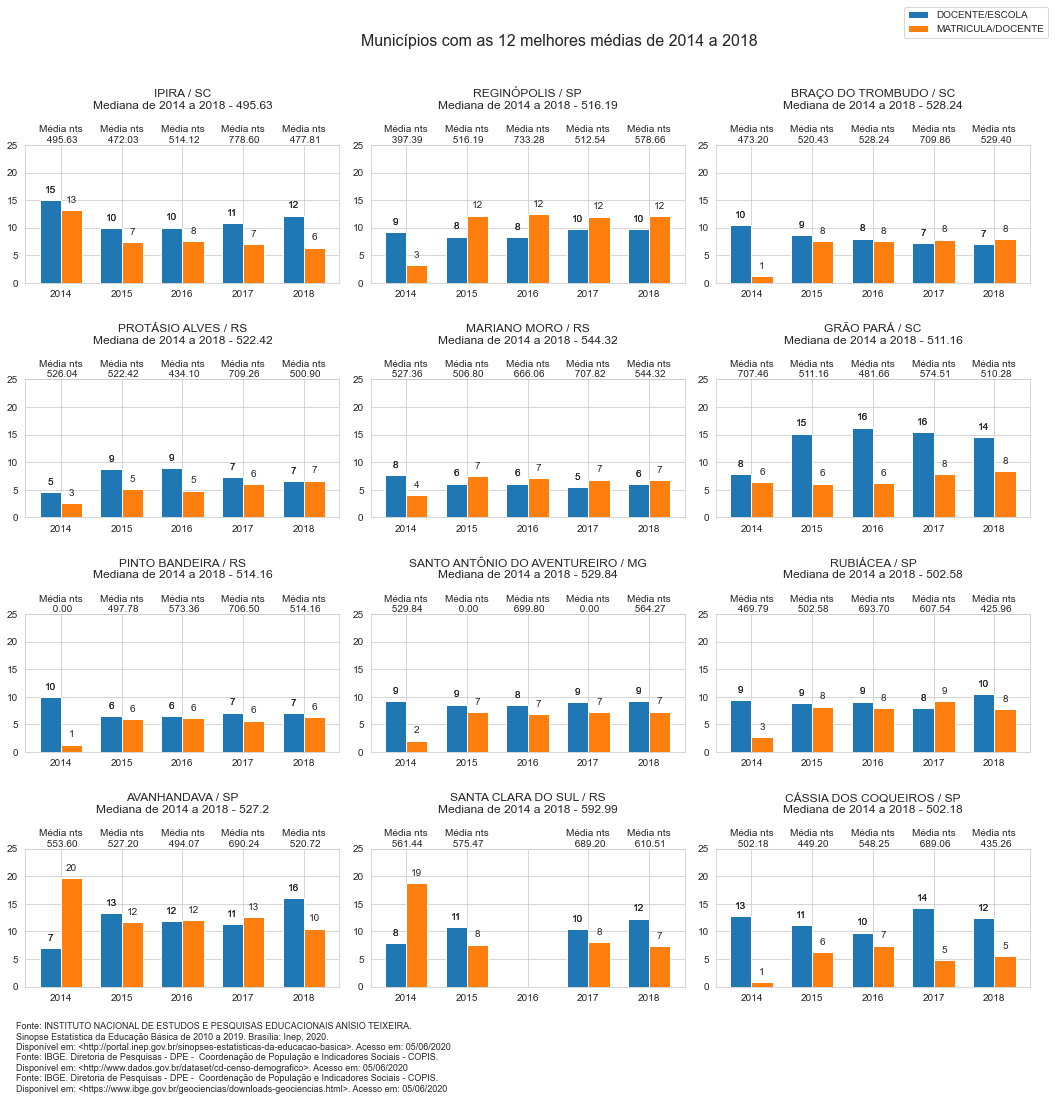

In [7]:
"""Plota a comparação das variáveis
Docentes / Escolas maior e Matrículas / Docentes
e as médias de 2014 a 2018 dos 12 municípios
que obtiveram os melhores resultados"""
analise.compara_melhores(df)         

As variáveis comparadas não demonstram nenhum padrão em relação às melhores médias obtidas nos 5 anos analisados, mas se pode observar que nem sempre os municípios obtiveram bons resultados.

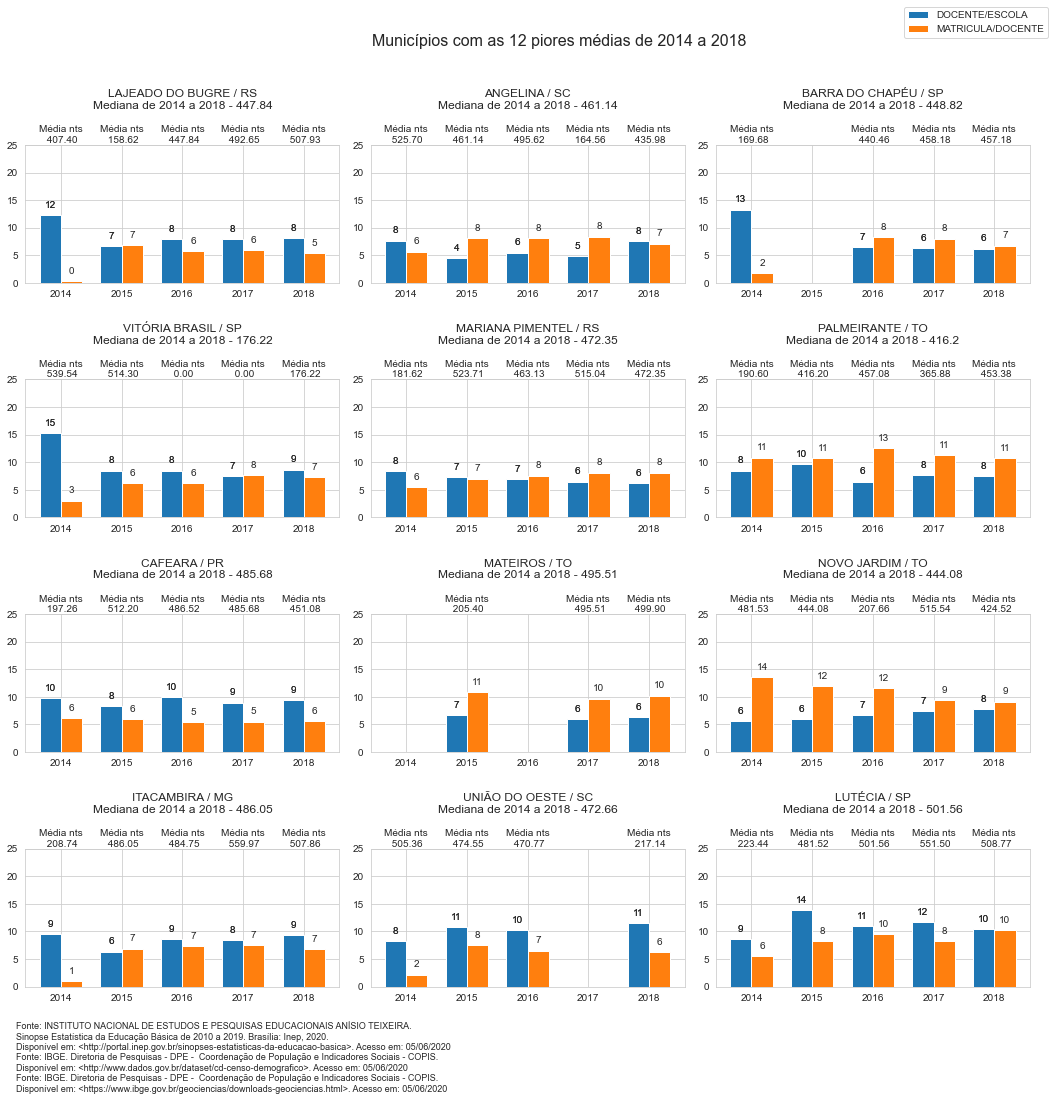

In [8]:
"""Plota a comparação das variáveis
Docentes / Escolas e Matrículas / Docentes
e as médias de 2014 a 2018 dos 12 municípios
que obtiveram os piores resultados"""
analise.compara_piores(df)

Comparando os 12 municípios com as melhores médias com os 12 municípios já se percebe que a proporção de matrículas por docente é maior na maioria dos municípios com os piores resultados, enquanto a proporção de docentes por escolas é maior nos municípios com os melhores resultados, mas não se pode considerar como relação direta com os resultados ruins.

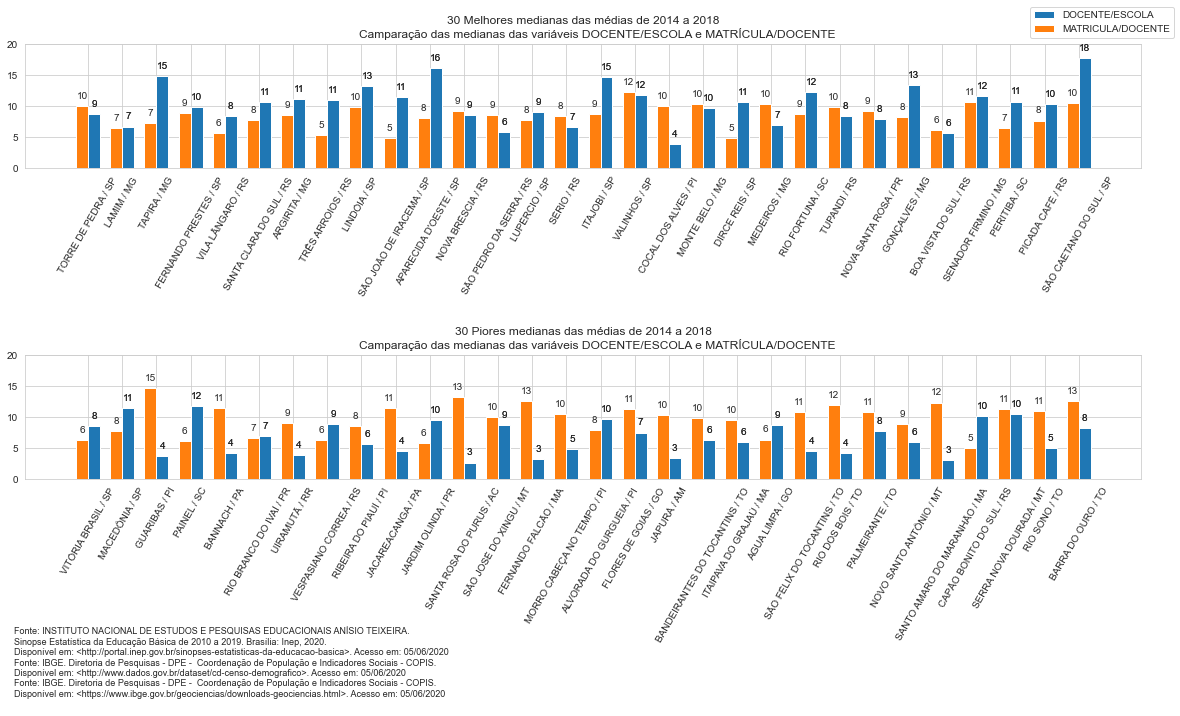

In [9]:
"""
Plota a comparação das variáveis Docentes / Escolas e Matrículas / Docentes
e as médias de 2014 a 2018 dos 30 municípios com os piores e melhores resultados"""
analise.compara_docente(df)

Como observado no gráfico anterior, pelo gráfico acima fica nítido que os municípios com os melhores resultados têm a proporção de docentes por escolas maior que matrículas por docentes. Apesar disso, ainda não se pode considerar relação direta com os bons ou maus resultados dos municípios.

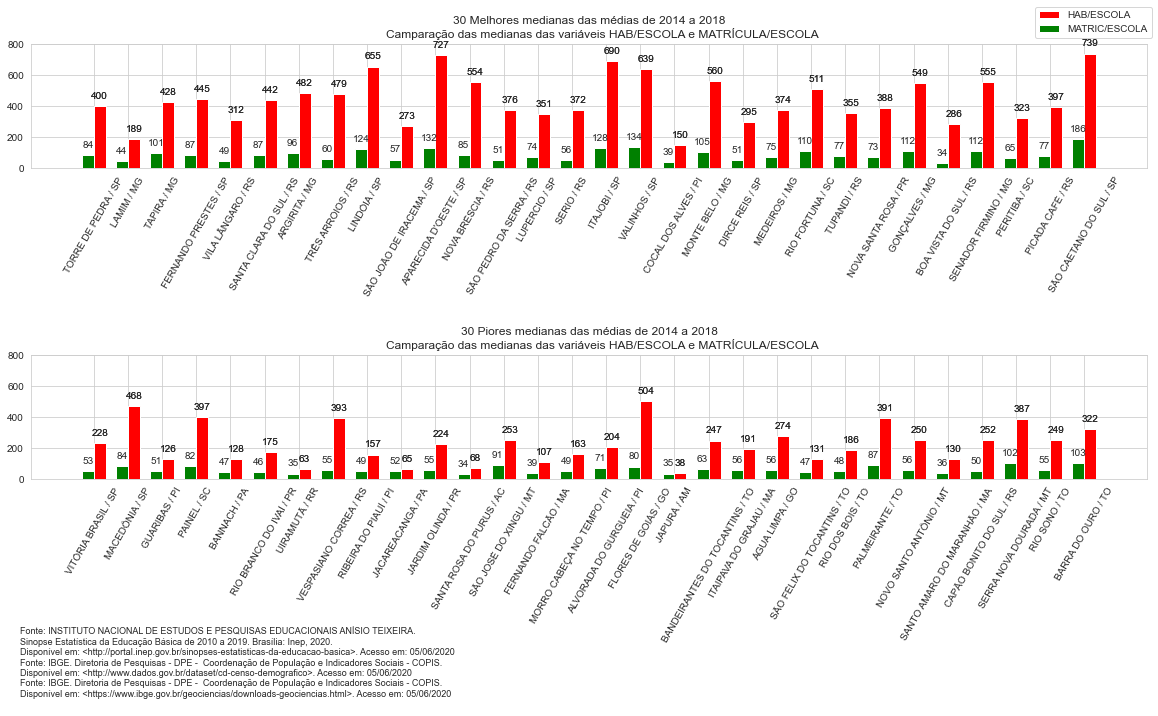

In [10]:
"""
Plota a comparação das variáveis Habitantes / Escolas e Matrículas / Escolas
e as médias de 2014 a 2018 dos 30 municípios com os piores e melhores resultados"""
analise.compara_escola(df)

O gráfico acima compara a proporção de habitantes por escolas e matrículas por escolas e mostra que os melhores resultados foram obtidos pelos municípios com as maiores quantidades de habitantes por escolas, mas não se pode considerar a relação direta com os bons ou maus resultados.

J:\GIT_Repositorios\POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados\projeto_3\ENEM\model\analise.py:378: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  width=5E6, height=5.2E6)
J:\GIT_Repositorios\POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados\projeto_3\ENEM\model\analise.py:381: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(color='gray')
J:\GIT_Repositorios\POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados\projeto_3\ENEM\model\analise.py:382: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawstates(color='gray')
J:\GIT_Repositorios\POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados\projeto_3\ENEM\model\analise.py:409: MatplotlibDeprecationWarning: 
The dedent 

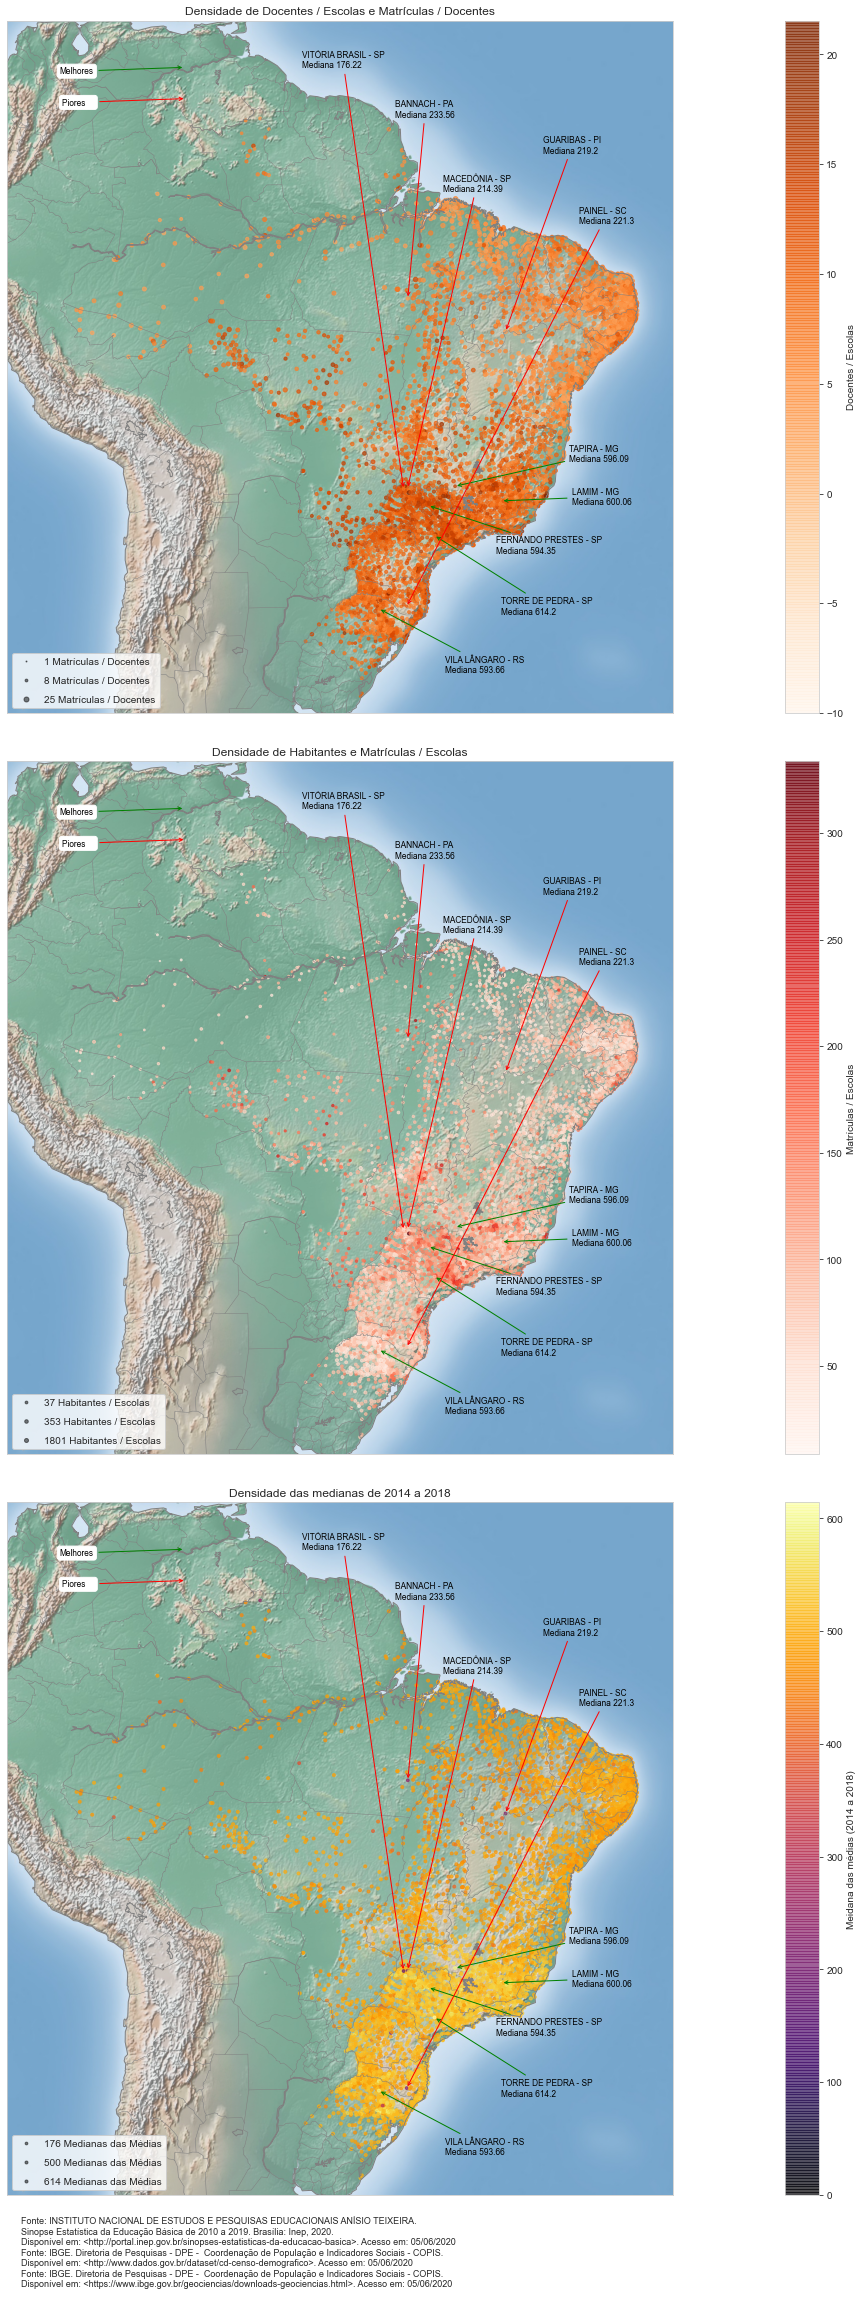

In [37]:
analise.compara_densidade(df)

Os mapas plotados acima ilustram as densidades das variáveis observadas e analisadas anteriormente identificando os 5 melhores e 5 piores resultados(Mediana das médias acumuladas de 2014 a 2018).

O primeiro indica que a densidade de docentes por escolas no norte e nordeste são considerávelmente menores e matrículas por docentes maior que no restante no país.

O segundo indica que a densidade de matrículas e habitantes por escolas são maiores no sul e sudeste que no restante no país.

O terceiro indica que os melhores resultados estão no sul e sudeste.

Analisando os três mapas, pode-se dizer que os melhores resultados estão onde há a proporção de habitantes e docentes por escolas maior, matrículas por docentes e escolas menor, mas não há comprovação matemática de correlação entre as variáveis analisadas. Há alguns indicadores que não estão relacionados com a estrutura educacional, como pode ser visto no terceiro mapa, alguns dos piores resultados estão em regiões isoladas no mapa, hipoteticamente o difícil acesso às escolas esteja relacionado aos maus resultados juntamente com outras variáveis estruturais gerais da região que não estão sendo levadas em consideração neste estudo.

In [12]:
df[['AREA_km²','POPULAÇÃO ESTIMADA','CAND_ESC_PUB', 'CAND_ESC_PRI', 'ENS_REGULAR', 'ENS_EJA', 'ENS_ESPECIAL', 'MEDIA_NOTAS',
       'TOTAL_MATRICULA_PUB', 'TOTAL_MATRICULA_PRI', 'TOTAL_DOCENTE_PUB', 'TOTAL_DOCENTE_PRI',
       'TOTAL_ESCOLA_PUB', 'TOTAL_ESCOLA_PRI', 'HAB/km²', 'ESCOLA/km²',
       'HAB/ESCOLA', 'MATRIC/ESCOLA', 'DOCENTE/ESCOLA', 'MATRICULA/DOCENTE']].sort_values('MEDIA_NOTAS', ascending=False).head(10)

AREA_km²  POPULAÇÃO ESTIMADA  CAND_ESC_PUB  CAND_ESC_PRI  ENS_REGULAR  \
20829   154.565                4562           0.0           0.0          0.0   
14654   410.406                8844           0.0           0.0          0.0   
20763    90.319                3709           0.0           0.0          0.0   
21309   172.815                2034           1.0           0.0          1.0   
21228    98.977                2190           1.0           0.0          1.0   
4320    338.156                6448           0.0           1.0          1.0   
21295   105.072                2868           0.0           0.0          0.0   
13865   202.033                3664           1.0           0.0          1.0   
14676   236.484                3015           0.0           0.0          0.0   
19735   338.370               13112           3.0           2.0          4.0   

       ENS_EJA  ENS_ESPECIAL  MEDIA_NOTAS  TOTAL_MATRICULA_PUB  \
20829      0.0           0.0       778.60                  515   
14654      0.0           0.0       733.28                  598   
20763      0.0           0.0       709.86                  509   
21309      0.0           0.0       709.26                  183   
21228      0.0           0.0       707.82                  195   
4320       0.0           0.0       707.46                 1644   
21295      0.0           0.0       706.50                  238   
13865      0.0           0.0       699.80                  413   
14676      0.0           0.0       693.70                  309   
19735      0.0           0.0       690.24                 1229   

       TOTAL_MATRICULA_PRI  TOTAL_DOCENTE_PUB  TOTAL_DOCENTE_PRI  \
20829                    0                 58                  0   
14654                    0                 39                  0   
20763                    0                 38                  0   
21309                    0                 19                  0   
21228                    0                 21                  0   
4320                     0                102                  0   
21295                    0                 27                  0   
13865                    0                 41                  0   
14676                    0                 29                  0   
19735                  129                 59                 22   

       TOTAL_ESCOLA_PUB  TOTAL_ESCOLA_PRI    HAB/km²  ESCOLA/km²  HAB/ESCOLA  \
20829                 2                 0  29.515091    0.077637  380.166667   
14654                 2                 0  21.549393    0.031676  680.307692   
20763                 4                 0  41.065557    0.166078  247.266667   
21309                 2                 0  11.769812    0.040506  290.571429   
21228                 5                 0  22.126353    0.090930  243.333333   
4320                 10                 0  19.068122    0.088716  214.933333   
21295                 4                 0  27.295569    0.085656  318.666667   
13865                 4                 0  18.135651    0.059396  305.333333   
14676                 3                 0  12.749277    0.033829  376.875000   
19735                 3                 2  38.750480    0.053196  728.444444   

       MATRIC/ESCOLA  DOCENTE/ESCOLA  MATRICULA/DOCENTE  
20829      75.750000       10.833333           6.992308  
14654     102.000000        8.230769          12.392523  
20763      56.466667        7.200000           7.842593  
21309      43.857143        7.285714           6.019608  
21228      37.333333        5.444444           6.857143  
4320       50.800000        7.900000           6.430380  
21295      40.555556        7.111111           5.703125  
13865      57.750000        8.500000           6.794118  
14676      73.125000        9.125000           8.013699  
19735     142.000000       11.277778          12.591133

Analisando os dados dos candidatos, com ralação ao tipo de ensino(regular, EJA ou especial) e dependência administrativa da escola do candidato, pública(Municipal, Estadual ou Federal) ou privada, observa-se que os melhores resultados foram obtidos por municípios relativamente pequenos e com muito mais escolas públicas que privadas. Mas não se pode afirmar que os resultados foram obtidos pelos alunos dessas escolas, pois o candidato pode optar por não informar e não há registros com esse dado na maioria dos casos.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27448 entries, 0 to 27447
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          27448 non-null  float64
 1   NM_UF_SIGLA                  27448 non-null  object 
 2   COD. MUNIC                   27448 non-null  int64  
 3   NOME_MUNICÍPIO               27448 non-null  object 
 4   AREA_km²                     27448 non-null  float64
 5   POPULAÇÃO ESTIMADA           27448 non-null  int32  
 6   MAT_Edu_ Infantil            27448 non-null  int32  
 7   MAT_Ens_Fundamental          27448 non-null  int32  
 8   MAT_Ens_ Médio               27448 non-null  int32  
 9   MAT_Educ_Prof_Técnica_Médio  27448 non-null  int32  
 10  MAT_Educ_Profissional(FIC)   27448 non-null  int32  
 11  MAT_EJA                      27448 non-null  int32  
 12  MAT_Educ_ Especial           27448 non-null  int32  
 13  QTD_Edu_ Infanti

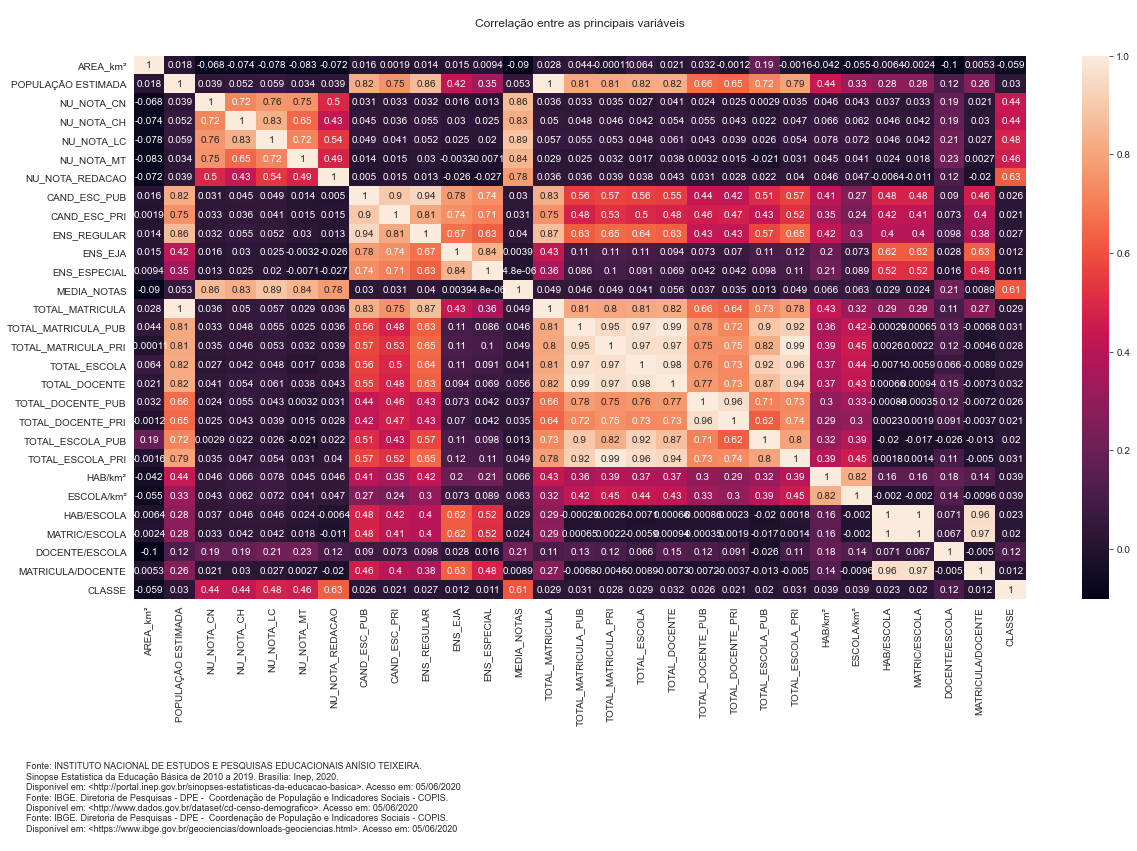

In [14]:
analise.compara_correlacao(df.drop(df.columns[6:49], inplace=False, axis=1))

O mapa de correlações indica que de fato não há correlação forte entre as variáveis pertinentes às hipóteses levantadas para este estudo, com exceção das próprias usadas para calcular as médias, a variável menos irrelevante é a proporção de docentes por escolas com valor de 0,21. Algumas variáveis possuem correlações que seguem a coerência de sua natureza, como por exemplo, matrícula/escola, hab/escola e matrícula/docente. Assim como as variáveis citadas, população estimada tem forte relação com total de escola, total de docente e total de matrículas.

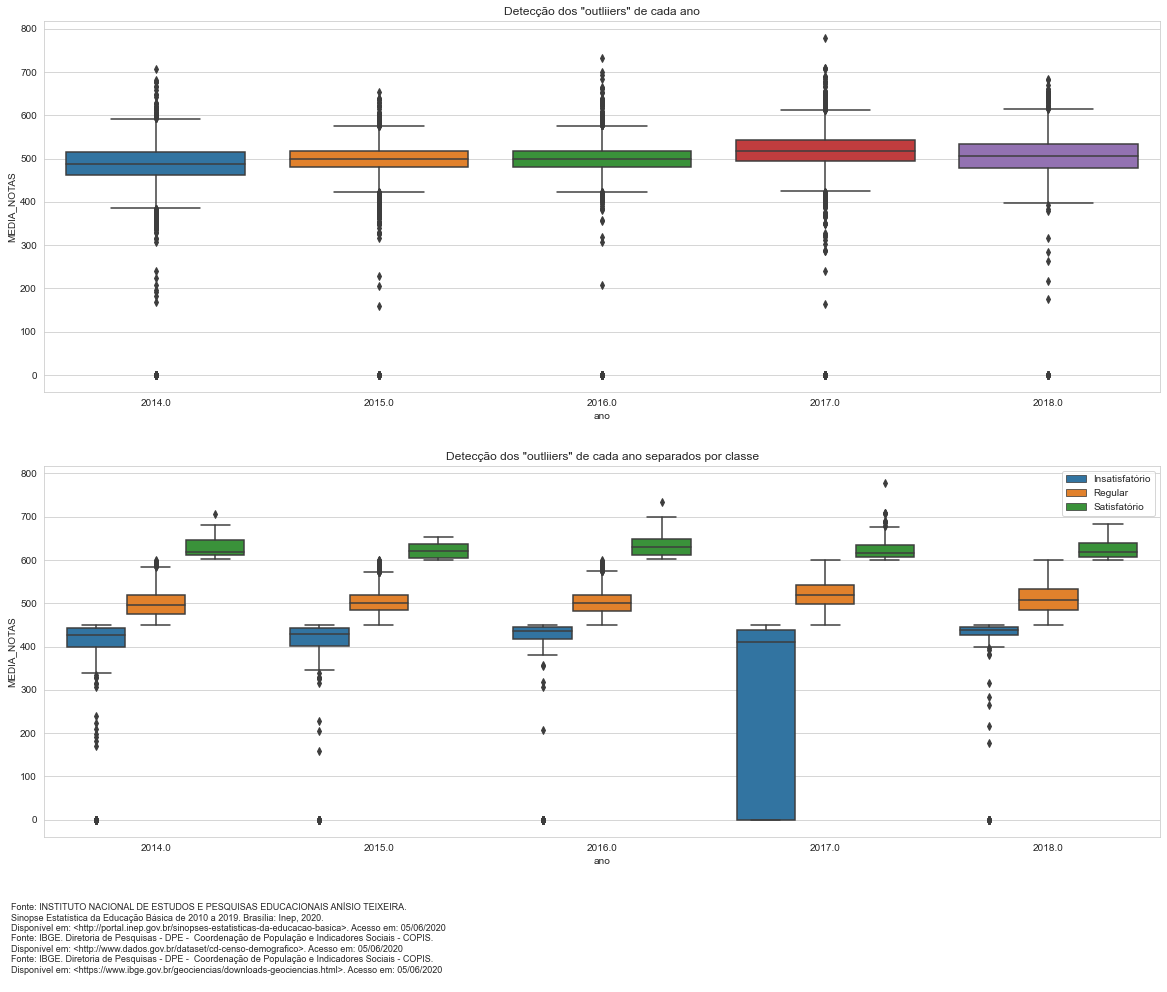

In [15]:
analise.get_outliers(df)

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***Tendo em vista a predição das médias simples das medianas de cada matéria do ano de 2019 será implementado um modelo para regressão e classificação.***

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


In [16]:
from model.regressor import Regressor
regressor = Regressor(df)
"""
O pré-processamento é feito pelo StandardScaler.
"""

X, y = regressor.scale_data(regressor.X, regressor.y)   # Escalona os dados

"""
Para seleção dos dados será utilizado o Sklearn SelectFromModel com base no Atributo 'feature_importances_'.
"""
regressor_dt    = regressor.tree(X, y, plot=False)
regressor_rf    = regressor.forest(X, y, plot=False)
regressor_sv    = regressor.svr(X, y, plot=False)
regressor_mlp   = regressor.mlp(X, y, plot=False)
regressor_gr    = regressor.gradient(X, y, plot=False)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                  random_state=1) - MAE = 20.09685567550571


RandomForestRegressor(random_state=1) - MAE = 19.813594728015932


SVR() - MAE = 20.52711654365971


MLPRegressor(random_state=1) - MAE = 19.96843228831245


GradientBoostingRegressor(random_state=1) - MAE = 20.054042482754916




O código abaixo cria o DataFrame com os resultados obtidos pelo *'StratifiedKFold'* fazendo 30 testes no modelo *'Cross Validate'* com 10 *'Splits'*

`
models = [regressor_dt,regressor_rf,regressor_sv,regressor_mlp, regressor_gr]
results, dct_results = validator.get_results(X, y, models)
df_results = pd.DataFrame(columns=list(dct_results.keys()), data=results)`

In [17]:
import pandas as pd
from model.validator import Validator

validator = Validator()

df_results = pd.read_csv('CSVs/results.csv')
df_results.mean(axis=0)

tree     -0.507556
forest   -0.505066
svr      -0.506072
mlp      -0.507567
gr       -0.507657
dtype: float64

Acima estão as médias negativas dos erros absolutos dos valores escalonados.

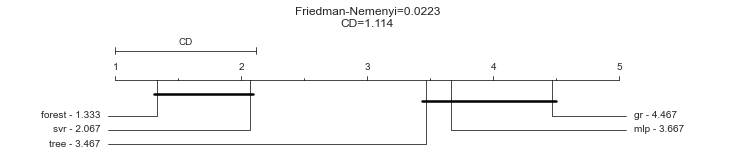

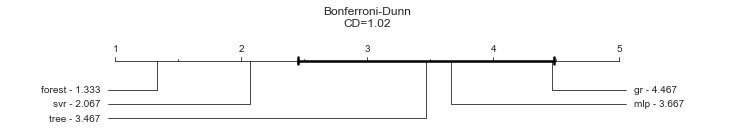

tree average rank: 3.466666666666667
forest average rank: 1.3333333333333333
svr average rank: 2.066666666666667
mlp average rank: 3.6666666666666665
gr average rank: 4.466666666666667

De acordo com o resultado do 'Wilcoxon signed-rank' com o p-value = 0.006.
Os modelos treinados:('forest', -0.5050664249685748) e ('svr', -0.5060723702424922) são equivalentes.
Considerando o nível de significância de (α) = 0.05.

'The Wilcoxon signed-rank test was not designed to compare multiple random variables.
So, when comparing multiple classifiers, an 'intuitive' approach would be to apply the Wilcoxon test to all possible pairs.
However, when multiple tests are conducted, some of them will reject the null hypothesis only by chance (Demšar, 2006).
For the comparison of multiple classifiers, Demšar (2006) recommends the Friedman test.'


O teste de Friedman calculou o p-value = 0.0223.
Considerando o nível de significância de (α) = 0.05, todos os modelos não são equivalentes.
Tendo em vista o Crit

In [18]:
result_fried, ranks, names, cds, average_ranks = validator.compare_results(df_results.values, df_results.columns)
    
validator.plot_comparisons(result_fried, names, cds[0], cds[1], average_ranks)
    
result_wilcox, models_par = validator.wilcoxon_method(df_results)

validator.visualizar_resultados_validacao(result_wilcox, result_fried, models_par, cds, average_ranks, list(df_results.columns))

Define o baseline com todas a features escalonadas e hiperparâmetros padrões dos modelos selecionados para combinação, que apesar do teste único indicar o RandomForestRegressor e MLPRegressor, após realizar os 30 testes os resultados mais equilibrados foram do RandomForestRegressor e Support Vector Regressor(SVR).

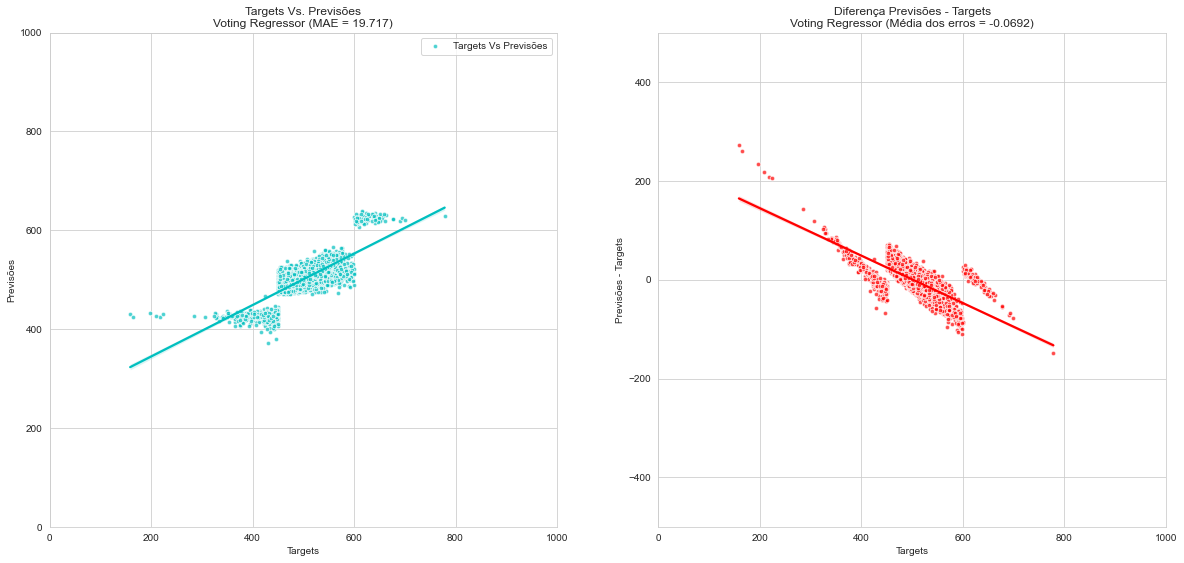

In [19]:
regressor_vr    = regressor.voting(X, y, [('rf',regressor_rf),('svr',regressor_sv)]) # Combina os 2 melhores modelos

Os modelos para o baseline foram selecionados a partir da média de 30 testes utilizando *Cross Validation 'StratifiedKFold'*, levando em consideração os critérios do *Friedman Test*.

O regressor com o melhor resultado foi o Random Forest e está definido como referência para seleção das features features com relevância > 0.004.

In [38]:
X = regressor.select_features(regressor_rf, X, y) # Seleciona as features com importância > 0,004

In [21]:
lst_features = df.drop(['ano', 'NM_UF_SIGLA', 'COD. MUNIC', 'NOME_MUNICÍPIO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','MEDIA_NOTAS'], inplace=False, axis=1).columns
print(*[lst_features[i] for i, val in enumerate(regressor_rf.feature_importances_) if val > 0.004], sep=' - ')

AREA_km² - POPULAÇÃO ESTIMADA - MAT_Edu_ Infantil - MAT_Ens_Fundamental - MAT_Ens_ Médio - MAT_Educ_Prof_Técnica_Médio - MAT_EJA - MAT_Educ_ Especial - QTD_Edu_ Infantil - QTD_EJA - QTD_Educ_ Especial - DOCENTE_ Infantil - DOCENTE_Fundamental - DOCENTE_ Médio - DOCENTE_Prof_Técnica_Médio - DOCENTE_EJA - DOCENTE_Especial - MAT_Estadual_ini - MAT_Municipal_ini - MAT_Estadual_final - MAT_Municipal_final - MAT_Privada_final - DOC_Pública_ini - DOC_Pública_final - DOC_Pública_Mult - ESC_Municipal_ini - ESC_Municipal_final - CAND_ESC_PUB - CAND_ESC_PRI - ENS_REGULAR - TOTAL_MATRICULA - TOTAL_MATRICULA_PUB - TOTAL_ESCOLA - TOTAL_DOCENTE - TOTAL_DOCENTE_PUB - TOTAL_ESCOLA_PUB - HAB/km² - ESCOLA/km² - HAB/ESCOLA - MATRIC/ESCOLA - DOCENTE/ESCOLA - MATRICULA/DOCENTE - CLASSE


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***A métrica escolhida para regressão é MAE(Mean Absolute Error)***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


***A divisão dos dados está implementada como função na classe Regressor com os parametros comentados abaixo.***

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.35)

5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


In [23]:
regressor_dt_tn    = regressor.tree(X, y, base=False)
regressor_rf_tn    = regressor.forest(X, y, base=False)
regressor_sv_tn    = regressor.svr(X, y, base=False)
regressor_mlp_tn   = regressor.mlp(X, y, base=False)
regressor_gr_tn    = regressor.gradient(X, y, base=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.3s finished


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=160,
                                                       max_features='auto',
                                                       max_leaf_nodes=20,
                                                       min_impurity_decrease=1e-05,
                                                       min_samples_leaf=4,
                                                       min_samples_split=5,
                                                       random_state=1),
                  learning_rate=1e-06, loss='square', n_estimators=500,
                  random_state=1) - MAE = 21.023157286629655


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 91.3min finished


RandomForestRegressor(bootstrap=False, ccp_alpha=1e-07, max_depth=120,
                      max_features='sqrt', min_impurity_decrease=1e-06,
                      min_samples_split=5, n_estimators=320, random_state=1) - MAE = 19.669473952540493


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=5, coef0=1, degree=5, epsilon=0.6, gamma='auto', max_iter=4000,
    shrinking=False, tol=0.01) - MAE = 20.427588453119974


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 34.0min finished


MLPRegressor(activation='tanh', alpha=1e-06, beta_2=0.993, early_stopping=True,
             hidden_layer_sizes=(22, 22), learning_rate_init=0.01, max_iter=300,
             momentum=0.3, nesterovs_momentum=False, random_state=1,
             warm_start=True) - MAE = 19.859648903902073


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


GradientBoostingRegressor(alpha=0.1, criterion='mse', learning_rate=0.01,
                          max_depth=15, max_features='sqrt',
                          min_samples_split=7, n_estimators=200, random_state=1,
                          subsample=0.1, tol=0.001) - MAE = 20.28939565201235




In [24]:
df_results_tn = pd.read_csv('CSVs/results_tn.csv')
df_results_tn.mean(axis=0).sort_values(ascending=False)

gr       -0.512805
mlp      -0.517915
svr      -0.519401
forest   -0.520177
tree     -0.531784
dtype: float64

O código abaixo cria o DataFrame com os resultados obtidos pelo *'StratifiedKFold'* fazendo 30 testes no modelo *'Cross Validate'* com 10 *'Splits'*

`
models = [regressor_dt_tn,regressor_rf_tn,regressor_sv_tn,regressor_mlp_tn, regressor_gr_tn]
results, dct_results = validator.get_results(X, y, models)
df_results_tn = pd.DataFrame(columns=list(dct_results.keys()), data=results)`

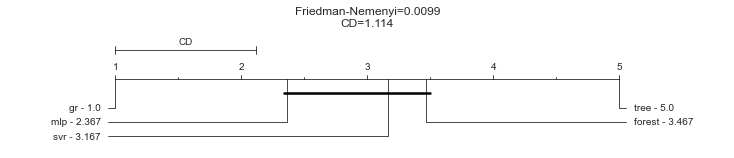

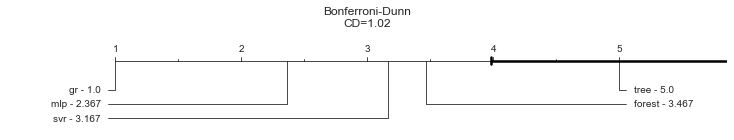

tree average rank: 5.0
forest average rank: 3.466666666666667
svr average rank: 3.1666666666666665
mlp average rank: 2.3666666666666667
gr average rank: 1.0

De acordo com o resultado do 'Wilcoxon signed-rank' com o p-value = 0.0.
Os modelos treinados:('gr', -0.512804895655462) e ('mlp', -0.5179152628027912) são equivalentes.
Considerando o nível de significância de (α) = 0.05.

'The Wilcoxon signed-rank test was not designed to compare multiple random variables.
So, when comparing multiple classifiers, an 'intuitive' approach would be to apply the Wilcoxon test to all possible pairs.
However, when multiple tests are conducted, some of them will reject the null hypothesis only by chance (Demšar, 2006).
For the comparison of multiple classifiers, Demšar (2006) recommends the Friedman test.'


O teste de Friedman calculou o p-value = 0.0099.
Considerando o nível de significância de (α) = 0.05, todos os modelos não são equivalentes.
Tendo em vista o Critical Distance (CD), somente os mode

In [25]:
result_fried, ranks, names, cds, average_ranks = validator.compare_results(df_results_tn.values, list(df_results_tn.columns))
    
validator.plot_comparisons(result_fried, names, cds[0], cds[1], average_ranks)

result_wilcox, models_par = validator.wilcoxon_method(df_results_tn)

validator.visualizar_resultados_validacao(result_wilcox, result_fried, models_par, cds, average_ranks, list(df_results_tn.columns))

Apesar do teste único ter apresentado o RandomForest e o MLPRegressor com os melhores resultados, os 30 testes *'Wilcoxon signed-rank', 'Friedman-Nemenyi' e 'Bonferroni-dunn'* apresentaram resultados diferentes.

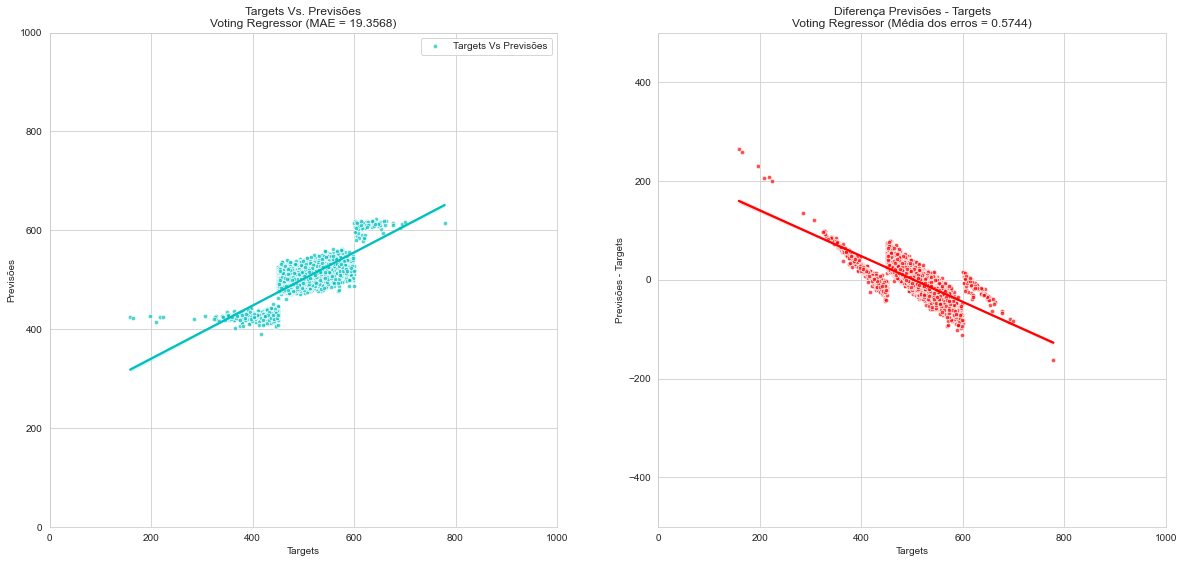

In [26]:
regressor_vr_tn    = regressor.voting(X, y,[('rf',regressor_rf_tn),('mlp', regressor_mlp_tn)])

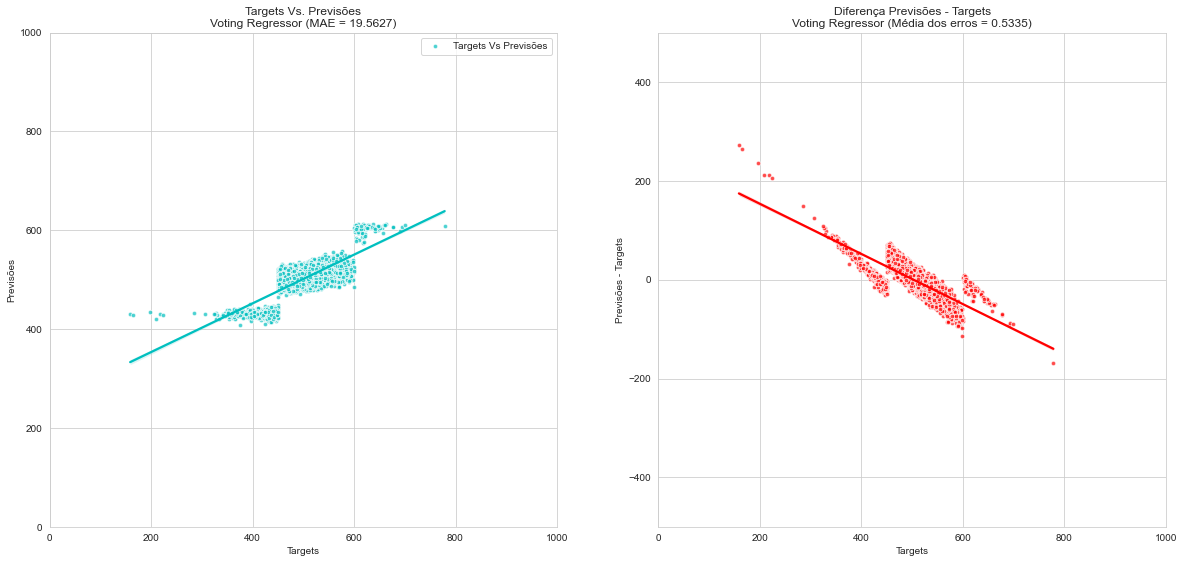

In [27]:
regressor_vr_tn_rank    = regressor.voting(X, y,[('gr',regressor_gr_tn),('mlp', regressor_mlp_tn)])

6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

Após testar várias combinações, o último teste será feito com o baseline e os dois melhores resultados. RandomForest + MLPRegressor, com os melhores resultados e o GradientBoosting + MLPRgressor, recomendados pelo rank.

In [28]:
df_results_final = pd.read_csv('CSVs/results_final.csv')
df_results_final.mean(axis=0)

baseline       -0.494696
Select_Valid   -0.493439
Best_result    -0.492213
dtype: float64

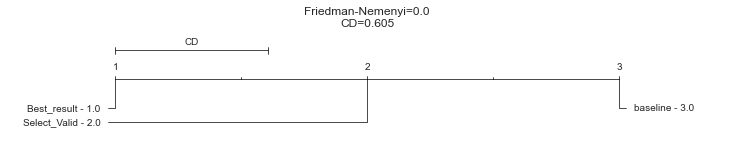

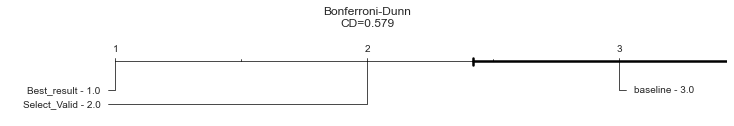

baseline average rank: 3.0
Select_Valid average rank: 2.0
Best_result average rank: 1.0

De acordo com o resultado do 'Wilcoxon signed-rank' com o p-value = 0.0.
Os modelos treinados:('Best_result', -0.4922133080029943) e ('Select_Valid', -0.49343869203509005) são equivalentes.
Considerando o nível de significância de (α) = 0.05.

'The Wilcoxon signed-rank test was not designed to compare multiple random variables.
So, when comparing multiple classifiers, an 'intuitive' approach would be to apply the Wilcoxon test to all possible pairs.
However, when multiple tests are conducted, some of them will reject the null hypothesis only by chance (Demšar, 2006).
For the comparison of multiple classifiers, Demšar (2006) recommends the Friedman test.'


O teste de Friedman calculou o p-value = 0.0.
Considerando o nível de significância de (α) = 0.05, todos os modelos não são equivalentes.
Tendo em vista o Critical Distance (CD), somente os modelos com a diferença entre as médias maior que, 0.605

In [29]:
result_fried, ranks, names, cds, average_ranks = validator.compare_results(df_results_final.values, list(df_results_final.columns))
    
validator.plot_comparisons(result_fried, names, cds[0], cds[1], average_ranks)

result_wilcox, models_par = validator.wilcoxon_method(df_results_final)

validator.visualizar_resultados_validacao(result_wilcox, result_fried, models_par, cds, average_ranks, list(df_results_final.columns))


Os resultados acima foram obtidos executando o código abaixo:

`
import numpy as np`

`
dct_results_final = {'baseline': validator.validate_models(X,y,regressor_vr),
                 'Select_Valid': validator.validate_models(X,y,regressor_vr_tn_gr_mpl),
                 'Best_result': validator.validate_models(X,y,regressor_vr_tn_rf_mpl)}`
                 
`
results_final = np.c_[results_final['baseline'],results_final['Select_Valid'],results_final['Best_result']]`

`
df_results_final = pd.DataFrame(columns=list(dct_results_final.keys()), data=results_final)
df_results_final.to_csv('CSVs/results_final.csv', index=False)`

=======================================================================================================================
baseline = Combinação do Random Forest com  a média de MAE = -0.5050664249685748 e Support Vector com  a média de MAE = -0.5060723702424922. (Hiperparâmetros padrões)

Select_Valid = Combinação do Gradient Boosting com  a média de MAE = -0.512804895655462 e Multi-layer Perceptron com  a média de MAE = -0.5179152628027912. (Hiperparâmetros selecionados pelo *RandomizedSearchCV*)

Best_result = Combinação do Random Forest com a média de MAE = -0.520176838214957 e Multi-layer Perceptron com a média de MAE = -0.5179152628027912. (Hiperparâmetros selecionados pelo *RandomizedSearchCV*)

**Obs.: Os valores das médias de erro absoluto apresentados nos teste são dos valores escalonados e operadores invertidos (Negative Mean Absolute Error).**

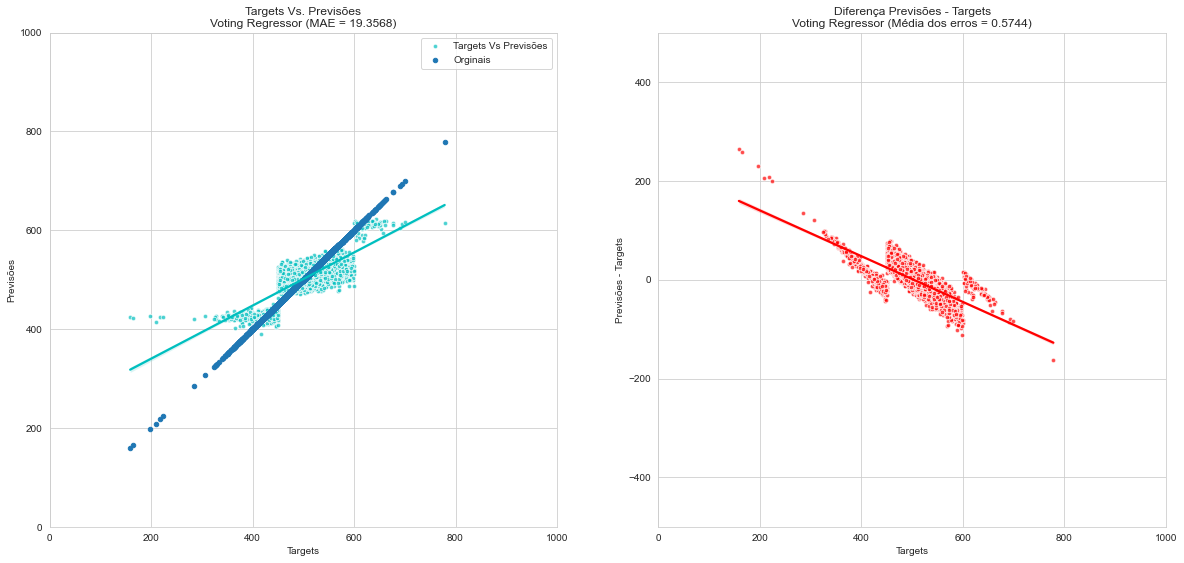

In [39]:
regressor_vr_tn = regressor.voting(X, y,[('rf',regressor_rf_tn), ('mlp',regressor_mlp_tn)], select=True)

In [31]:
from model.classificador import Classificador
classificador = Classificador(df)

X = classificador.scale_data(classificador.X)

class_dt   = classificador.tree(X, base=False)
class_rf   = classificador.forest(X, base=False)
class_gb   = classificador.gradient(X, base=False)
class_mlp  = classificador.mlp(X, base=False)
class_sv   = classificador.svc(X, base=False)

Adaboost + Decision Tree Classifier - Score = 0.9191908604968033
Random Forest Classifier - Score = 0.9191908604968033
Gradient Boosting - Score = 0.9191908604968033
Neural Network - MLP Classifier - Score = 0.9189812388638507


C:\Users\TOP Artes\.conda\envs\proj\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC Support Vector Classifier - Score = 0.9043286867204695


### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*

Após todas as análises e testes realizados, as hipóteses não foram confirmadas matematicamente.
<ol>
    <li>A Extenção territorial influencia no desempenho?</li>
        Não foi confirmada matematicamente e não há indícios de infuência dessa variável nos resultados.
    <li>A densidade populacional(hab/km²) influencia no desempenho?</li>
        Não foi confirmada matematicamente e não há indícios de infuência dessa variável nos resultados.
    <li>A proporção de habitantes/Escola influencia no desempenho?</li>
        Não foi confirmada matematicamente, mas pode-se observar que os melhores resultados foram obtidos por municípios com densidade habitantes/Escola alta, contudo, nenhum deles é considerado grande metrópole.
    <li>A proporção de matrículas/Escola influencia no desempenho?</li>
        Não foi confirmada matematicamente e não há indícios de infuência dessa variável nos resultados.
    <li>A proporção de docentes/Escola influencia no desempenho?</li>
        Não foi confirmada matematicamente, mas pode-se observar que juntamente com docentes/matrícula, formam um conjunto de fatores que na maioria dos casos se relacionam com os resultados.
    <li>A proporção de docentes/matrícula influencia no desempenho?</li>
        Não foi confirmada matematicamente, mas pode-se observar que juntamente com docentes/matrícula, formam um conjunto de fatores que na maioria dos casos se relacionam com os resultados
</ol>
Conclui-se que não há correlação forte entre as variáveis mas pode-se observar que há uma tendência de se obter melhores resultados quando a proporção de docentes/Escola é maior que docentes/matrícula.

Tendo em vista que a grande maioria dos melhores resultados têm essa característica e dentre os piores resultados poucos a têm, manter o equilíbrio entre essas variáveis tenderia a obtenção de bons resultados no Enem.

Sabendo que se a quantidade de docentes/Escola é baixa, hipoteticamente falta docentes no município, e que se a quantidade de docentes/matrícula é baixa, os docentes estão sobrecarregados.